# Impacto de los Proyectos de Ciencia, Tecnología e Innovación en el Desarrollo Regional: Un Análisis Cuantitativo por Áreas Temáticas y Financiamiento


# **1. Introducción**
## **Tema Principal**
 Explorar cómo los proyectos de investigación financiados contribuyen al desarrollo regional en Colombia.

# **2. Planteamiento del Problema**
## **Contexto:**
 Aunque se han financiado numerosos proyectos en Colombia, persisten desigualdades en el desarrollo regional. Esto plantea la pregunta de si las inversiones en investigación están teniendo un impacto real en el crecimiento económico y social en las diferentes regiones.
## **Problema Central:**
 Existe una falta de claridad sobre cómo las inversiones en proyectos de investigación están relacionadas con indicadores de desarrollo regional.

 ## **Objetivo**
 Identificar patrones, tendencias y posibles áreas de mejora en la distribución y el impacto de los proyectos.

## **Preguntas Clave**
¿En qué áreas temáticas se están concentrando los proyectos de investigación?

¿Cómo están distribuidos regionalmente los proyectos?

¿Qué tipo de financiación predomina y cómo afecta al monto total?
## **Objetivo Específico:**
 Analizar los datos de proyectos financiados para identificar tendencias en las áreas temáticas, el monto financiado y la distribución geográfica, como primer paso para evaluar su impacto.

##**Alcance del proyecto**
 Evaluar la distribución geográfica, temática y financiera de los proyectos de investigación financiados en Colombia entre 2007 y 2020 para identificar patrones, tendencias y brechas que impactan el desarrollo regional.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Proyectos-de-Investigaci-n-e-Innovaci-n-evaluados-/6hgx-q9pi/about_data
!git clone https://github.com/Diazbj/ProyectoAnalisisDeDatos.git
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ruta='/content/ProyectoAnalisisDeDatos/DataSetProyectosInvestigacion.csv'


Cloning into 'ProyectoAnalisisDeDatos'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 70 (delta 34), reused 24 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 3.64 MiB | 12.39 MiB/s, done.
Resolving deltas: 100% (34/34), done.


#**3. Cargar Datos**

In [7]:
dfOriginal=pd.read_csv(ruta)
dfOriginal.head()

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,DESC_CONVOCATORIA,CODIGO_PROYECTO,TITULO_PROYECTO,FECHA_REGISTRO,FECHA_APROBACION,ENTIDAD_EJECUTA,TIPO_FINANCIACION,...,NME_DEPTO_ENTIDAD,COD_DANE_CIUDAD_PRY,NME_CIUDAD_PRY,COD_DANE_DEPTO_PRY,NME_DEPTO_PRY,TPO_PROYECTO,NME_TIPO_PROYECTO,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP
0,54756,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,212074455505,Susceptibilidad a Anfotericina B en aislamient...,24/05/2016,31/03/2017,No disponible,RC,...,No disponible,11001,BOGOTA D.C.,11,BOGOTA D.C.,P,Proyecto,0,0,0
1,54906,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,210474455818,Estudio del efecto de la infeccion por virus Z...,24/05/2016,31/03/2017,No disponible,RC,...,No disponible,11001,BOGOTA D.C.,11,BOGOTA D.C.,P,Proyecto,0,0,0
2,54846,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,130874455696,Sindrome febril por arbovirus en ninos de Cali...,12/06/2016,31/03/2017,No disponible,RC,...,No disponible,11001,BOGOTA D.C.,11,BOGOTA D.C.,P,Proyecto,0,0,0
3,54778,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,210474455553,Competencia vectorial de cepas de Stegomyia ae...,09/06/2016,31/03/2017,No disponible,RC,...,No disponible,11001,BOGOTA D.C.,11,BOGOTA D.C.,P,Proyecto,0,0,0
4,54797,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,111574455595,MOLECULAS SINTETICAS CON POTENCIAL ANTI-DENGUE...,24/05/2016,31/03/2017,No disponible,RC,...,No disponible,5001,MEDELLIN,5,ANTIOQUIA,P,Proyecto,0,0,0


# ***4. Análisis Exploratorio Inicial***


##**4.1 Descripción General del Dataset**


In [8]:
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PROYECTO_ID              3097 non-null   int64 
 1   CONVOCATORIA_ID          3097 non-null   int64 
 2   ANO_CONVOCATORIA         3097 non-null   int64 
 3   DESC_CONVOCATORIA        3097 non-null   object
 4   CODIGO_PROYECTO          3097 non-null   int64 
 5   TITULO_PROYECTO          3097 non-null   object
 6   FECHA_REGISTRO           3097 non-null   object
 7   FECHA_APROBACION         3097 non-null   object
 8   ENTIDAD_EJECUTA          3097 non-null   object
 9   TIPO_FINANCIACION        3097 non-null   object
 10  DESC_FINANCIACION        3097 non-null   object
 11  COD_PROG_CTI             3097 non-null   int64 
 12  NME_PROG_CTI             3097 non-null   object
 13  COD_AREA_TEMATICA        3097 non-null   object
 14  AREA_TEMATICA            3097 non-null  

Total de proyectos: 3097

variables: 31

Tipos de datos: objetos y enteros


##**4.2 Tabla de estadisticas**

In [9]:
dfOriginal.describe()

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,CODIGO_PROYECTO,COD_PROG_CTI,COD_DANE_CIUDAD_ENTIDAD,COD_DANE_DEPTO_ENTIDAD,COD_DANE_CIUDAD_PRY,COD_DANE_DEPTO_PRY,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP
count,3097.000000,3097.000000,3097.000000,3.097000e+03,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3.097000e+03,3.097000e+03,3.097000e+03
mean,47943.789797,11215.924766,2013.066193,1.976425e+11,68.630287,23219.172425,23.191153,24448.727155,24.404262,3.053781e+08,2.862928e+08,5.907729e+08
std,10302.783033,607.661951,3.241936,1.990597e+11,99.623386,25476.690321,25.469448,26262.714875,26.240587,4.502510e+08,3.764191e+08,7.425444e+08
min,30367.000000,-1238.000000,2007.000000,2.504300e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,38862.000000,11168.000000,2010.000000,1.109866e+11,6.000000,5001.000000,5.000000,5001.000000,5.000000,1.497000e+08,1.071697e+08,2.853134e+08
50%,45265.000000,11204.000000,2012.000000,1.130518e+11,17.000000,11001.000000,11.000000,11001.000000,11.000000,2.245100e+08,2.006000e+08,4.666733e+08
75%,53868.000000,11313.000000,2015.000000,1.415657e+11,154.000000,25175.000000,25.000000,41001.000000,41.000000,3.491250e+08,3.415932e+08,6.937500e+08
max,82694.000000,11510.000000,2020.000000,3.367102e+12,374.000000,94001.000000,94.000000,99001.000000,99.000000,1.034819e+10,8.580000e+09,1.661400e+10


### **Montos Financiados:** El monto promedio financiado (MONTO_FINANCIADO_AP) es de aproximadamente 3.5, pero la desviación estándar es alta 4.5, lo que indica que hay una gran variabilidad en los valores financiados se puede ver en el mínimo (0) y el máximo (10.35 mil millones) esta variabilidad.

##**4.3 Analisis Exploratorio Monto Financiado**

### 4.3.1 Análisis de Frecuencia para Áreas de Ciencia con Monto Financiado en Cero

In [10]:

datosCero = dfOriginal[dfOriginal['MONTO_FINANCIADO_AP'] == 0]
frecuenciaDatosCero=datosCero['NME_AREA_CIENCIA'].value_counts().reset_index()
frecuenciaDatosCero.columns=['NME_AREA_CIENCIA', 'Frecuencia']
frecuenciaDatosCero

,NME_AREA_CIENCIA,Frecuencia
0,No disponible,259
1,2 INGENIERIA Y TECNOLOGIA,8
2,22 INGENIERIA ELECTRICA ELECTRONICA,6
3,11 MATEMATICAS E INFORMATICA,5
4,14 CIENCIAS DE LA TIERRA Y DEL MEDIO AMBIENTE,3
5,N. A.,3
6,52 ECONOMIA,2
7,23 OTRAS CIENCIAS DE LA INGENIERIA,1
8,42 MEDICINA VETERINARIA,1
9,41 AGRICULTURA SELVICULTURA PESCA Y AFINES,1


### 4.3.2 Visualización de la Distribución del Monto Financiado

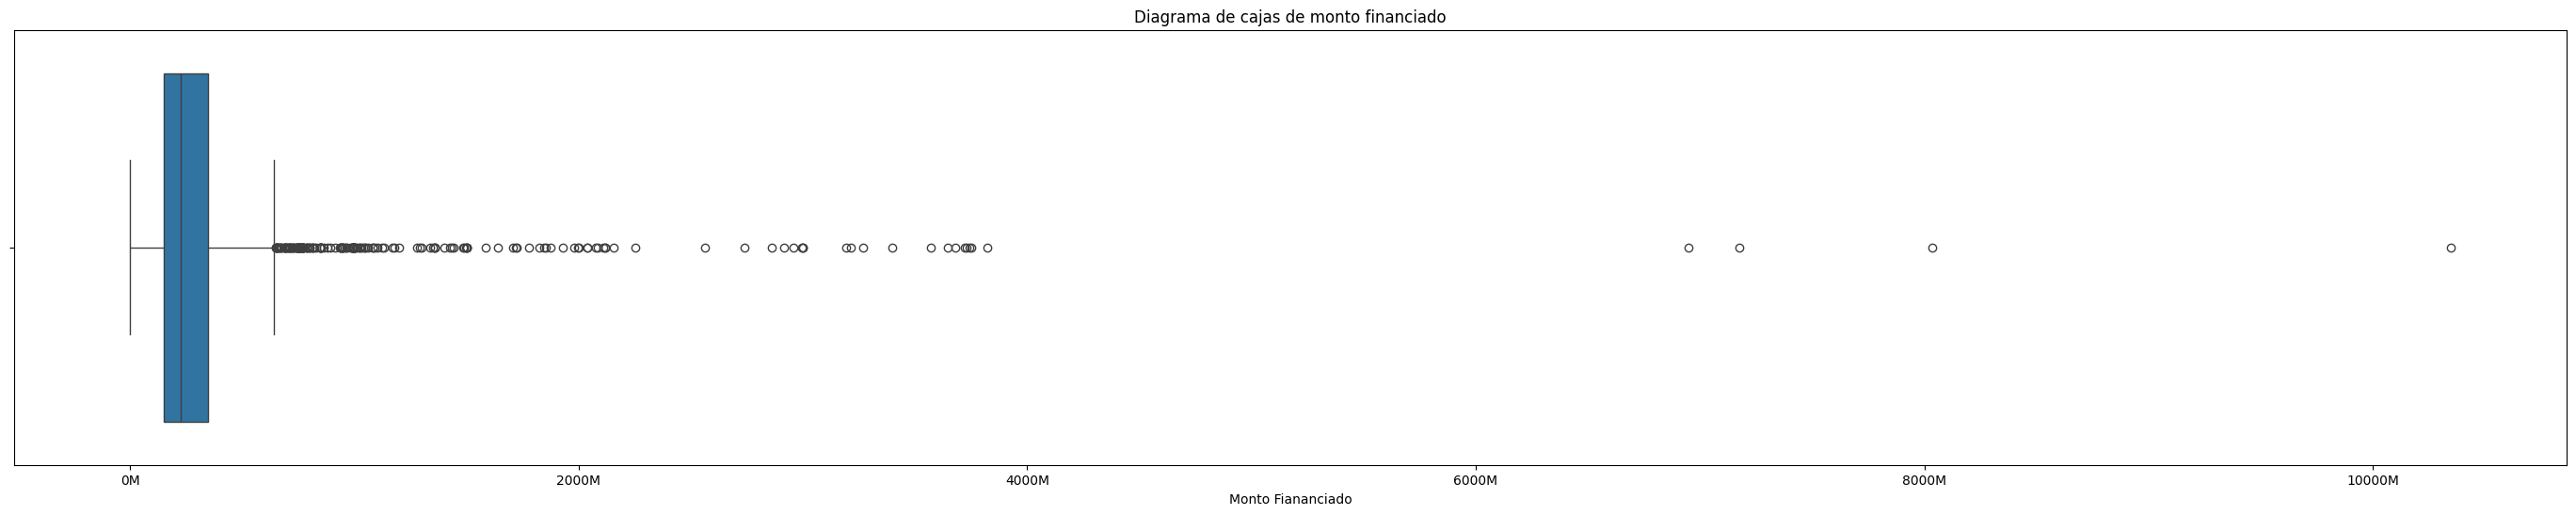

In [11]:
plt.figure(figsize=(35, 6))
sns.boxplot(x=dfOriginal['MONTO_FINANCIADO_AP'])
plt.title('Diagrama de cajas de monto financiado')
plt.xlabel('Monto Fiananciado')
# Formatear los valores del eje x en millones
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')  # Dividir por 1 millón y agregar "M"
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

In [12]:
projectosEnCero=(dfOriginal['MONTO_FINANCIADO_AP']==0).sum()
print(f"de los 3097 datos registrados {projectosEnCero} no tienen monto financiado ")

de los 3097 datos registrados 295 no tienen monto financiado 


## **4.4 Analisis Exploratorio Fecha Aprobacion**

###4.4.1 Análisis de Frecuencia para Áreas de Ciencia con fecha de aprobacion


In [13]:
dfOriginal['FECHA_APROBACION'] = pd.to_datetime(dfOriginal['FECHA_APROBACION'])
area_distribution = dfOriginal.groupby([dfOriginal['FECHA_APROBACION'].dt.date, 'NME_AREA_CIENCIA']).size().reset_index(name='Count')
area_distribution

<ipython-input-13-f8a10848c9b8>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfOriginal['FECHA_APROBACION'] = pd.to_datetime(dfOriginal['FECHA_APROBACION'])


,FECHA_APROBACION,NME_AREA_CIENCIA,Count
0,1900-01-01,11 MATEMATICAS E INFORMATICA,5
1,1900-01-01,13 CIENCIAS QUIMICAS,1
2,1900-01-01,14 CIENCIAS DE LA TIERRA Y DEL MEDIO AMBIENTE,3
3,1900-01-01,15 CIENCIAS BIOLOGICAS,1
4,1900-01-01,2 INGENIERIA Y TECNOLOGIA,4
...,...,...,...
421,2020-10-10,No disponible,6
422,2020-10-23,No disponible,1
423,2020-12-04,No disponible,2
424,2021-02-19,No disponible,7


### 4.4.2 Visualización de la Distribución de Fecha de Aprobacion

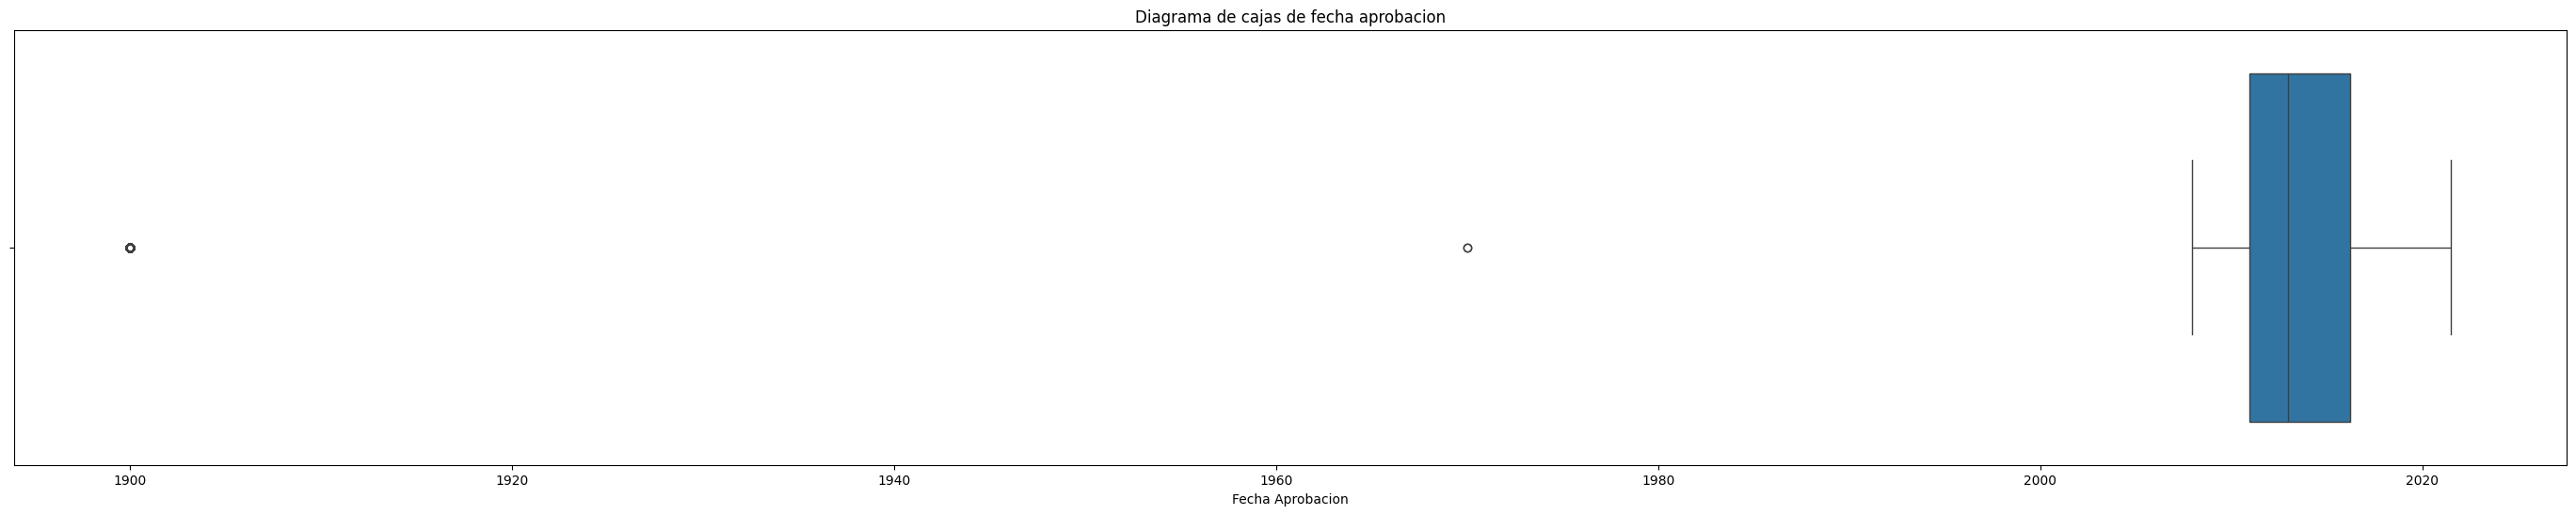

In [14]:
plt.figure(figsize=(35, 6))
sns.boxplot(x=dfOriginal['FECHA_APROBACION'])
plt.title('Diagrama de cajas de fecha aprobacion')
plt.xlabel('Fecha Aprobacion')
plt.show()

## **4.5 Analisis Exploratorio Departamentos**

###4.5.1 Análisis de Departamentos

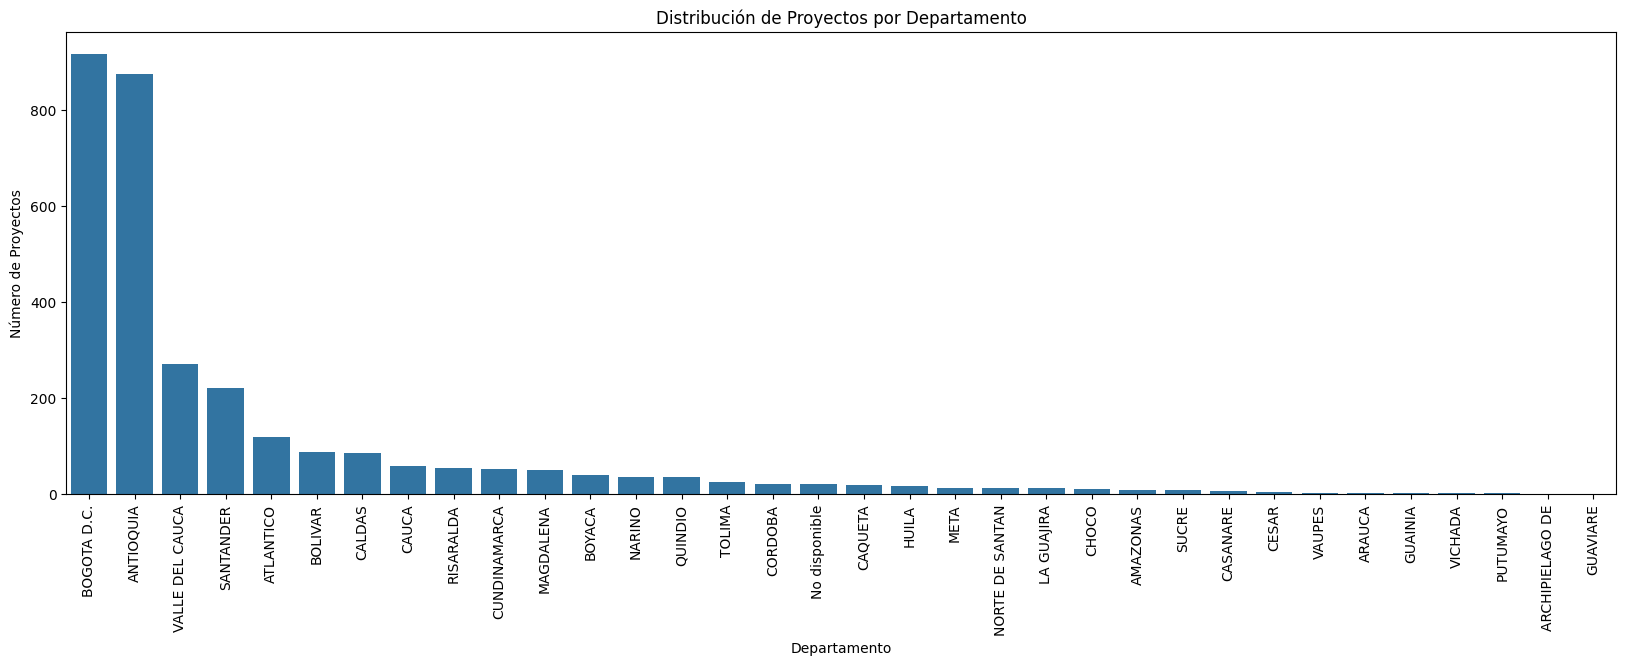

In [36]:
plt.figure(figsize=(20, 6))
sns.countplot(x='NME_DEPTO_PRY', data=dfOriginal, order=dfOriginal['NME_DEPTO_PRY'].str.slice(0, 15).value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribución de Proyectos por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Proyectos')
plt.show()

###4.5.2 Departamentos con informacion No disponibles

In [16]:
depNoDisponible=dfOriginal[dfOriginal['NME_DEPTO_PRY']=='No disponible']
noDisponible=depNoDisponible['NME_DEPTO_PRY'].value_counts()
noDisponible

,count
NME_DEPTO_PRY,
No disponible,21


# ***5 Limpieza de datos***

##**5.1 Cambio de tipo de dato en Fechas**

In [22]:
dfLimpieza=dfOriginal

dfLimpieza['FECHA_REGISTRO'] = pd.to_datetime(dfLimpieza['FECHA_REGISTRO'], format='%d/%m/%Y')
dfLimpieza['FECHA_APROBACION'] = pd.to_datetime(dfLimpieza['FECHA_APROBACION'], format='%d/%m/%Y')
dfLimpieza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PROYECTO_ID              3097 non-null   int64         
 1   CONVOCATORIA_ID          3097 non-null   int64         
 2   ANO_CONVOCATORIA         3097 non-null   int64         
 3   DESC_CONVOCATORIA        3097 non-null   object        
 4   CODIGO_PROYECTO          3097 non-null   int64         
 5   TITULO_PROYECTO          3097 non-null   object        
 6   FECHA_REGISTRO           3097 non-null   datetime64[ns]
 7   FECHA_APROBACION         3097 non-null   datetime64[ns]
 8   ENTIDAD_EJECUTA          3097 non-null   object        
 9   TIPO_FINANCIACION        3097 non-null   object        
 10  DESC_FINANCIACION        3097 non-null   object        
 11  COD_PROG_CTI             3097 non-null   int64         
 12  NME_PROG_CTI             3097 non-

## **5.2 Eliminar filas donde Monto Financiado es 0**

In [23]:
dfLimpieza1 = dfLimpieza[dfLimpieza['MONTO_FINANCIADO_AP'] != 0]

##**5.3 Eliminar datos atipicos Monto Financiado**

### 5.3.1 Calcular el rango intercuartílico (IQR) Monto financiado

In [24]:
Q1 = dfLimpieza1['MONTO_FINANCIADO_AP'].quantile(0.25)
Q3 = dfLimpieza1['MONTO_FINANCIADO_AP'].quantile(0.75)
IQR = Q3 - Q1

### 5.3.2 Definir los límites para identificar outliers

In [25]:
LimiteInferior = Q1 - 1.5 * IQR
LimiteSuperior = Q3 + 1.5 * IQR

### 5.3.3 Filtrar los outliers de monto financiado

In [26]:
dfLimpieza1 = dfLimpieza1[(dfLimpieza1['MONTO_FINANCIADO_AP'] >= LimiteInferior) &(dfLimpieza1['MONTO_FINANCIADO_AP'] <= LimiteSuperior)]

##**5.4 Eliminar datos atipicos fecha de aprobacion**

###5.4.1 Calcular el rango intercuartílico (IQR) Fecha de aprobacion

In [27]:
Q1_fecha = dfLimpieza1['FECHA_APROBACION'].quantile(0.25)
Q3_fecha = dfLimpieza1['FECHA_APROBACION'].quantile(0.75)
IQR_fecha = Q3_fecha - Q1_fecha

### 5.4.2 Definir los límites para identificar outliers

In [28]:
LimiteInferiorFecha = Q1_fecha - 1.5 * IQR_fecha
LimiteSuperiorFecha = Q3_fecha + 1.5 * IQR_fecha

### 5.4.3 Filtrar los outliers de Fecha de aprobacion

In [29]:
dfLimpieza2 = dfLimpieza1[
    (dfLimpieza1['FECHA_APROBACION'] >= LimiteInferiorFecha) &
    (dfLimpieza1['FECHA_APROBACION'] <= LimiteSuperiorFecha)
]

## **5.5 Grafico de cajas después de eliminar los ceros y los outliers**

###5.5.1 Grafico de cajas Monto Financiado

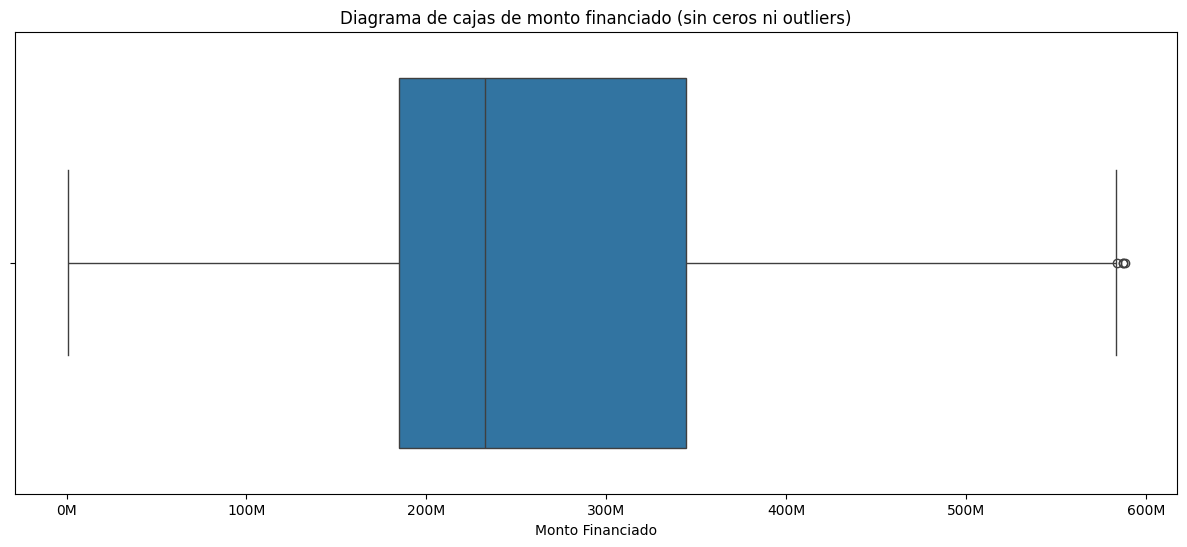

In [30]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=dfLimpieza2['MONTO_FINANCIADO_AP'])
plt.title('Diagrama de cajas de monto financiado (sin ceros ni outliers)')
plt.xlabel('Monto Financiado')

# Formatear los valores del eje x en millones (opcional)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

###5.5.2 Grafico de cajas Fecha de Aprobacion

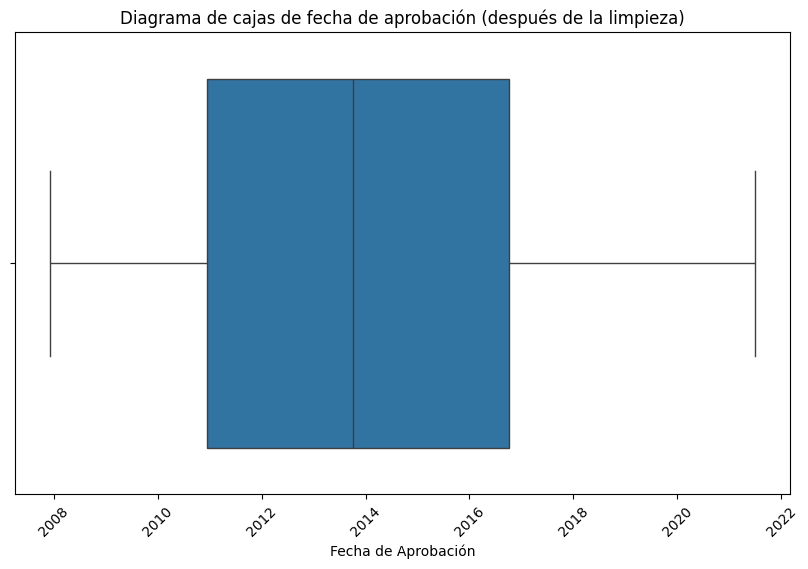

In [31]:
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura
sns.boxplot(x=dfLimpieza2['FECHA_APROBACION'])
plt.title('Diagrama de cajas de fecha de aprobación (después de la limpieza)')
plt.xlabel('Fecha de Aprobación')
plt.xticks(rotation=45) # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [32]:
dfLimpieza2.describe()

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,CODIGO_PROYECTO,FECHA_REGISTRO,FECHA_APROBACION,COD_PROG_CTI,COD_DANE_CIUDAD_ENTIDAD,COD_DANE_DEPTO_ENTIDAD,COD_DANE_CIUDAD_PRY,COD_DANE_DEPTO_PRY,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP
count,2468.000000,2468.000000,2468.000000,2.468000e+03,2468,2468,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2.468000e+03,2.468000e+03,2.468000e+03
mean,48465.138574,11223.890600,2013.243922,1.835818e+11,2013-10-16 07:07:05.931928832,2014-02-26 07:03:00.875202560,71.713533,23299.091572,23.273501,24463.153160,24.421394,2.539869e+08,2.727449e+08,5.262916e+08
min,30367.000000,-604.000000,2007.000000,1.416324e+10,2009-01-16 00:00:00,2007-12-07 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,6.039960e+05,0.000000e+00,1.797661e+06
25%,38785.750000,11168.000000,2010.000000,1.107778e+11,2010-10-15 00:00:00,2010-12-15 00:00:00,6.000000,5001.000000,5.000000,5001.000000,5.000000,1.849386e+08,1.345958e+08,3.261327e+08
50%,47076.000000,11231.000000,2013.000000,1.121658e+11,2013-05-31 00:00:00,2013-10-03 00:00:00,16.000000,11001.000000,11.000000,11001.000000,11.000000,2.328139e+08,2.121375e+08,4.790299e+08
75%,54978.500000,11324.000000,2016.000000,1.299778e+11,2016-06-01 00:00:00,2016-10-05 00:00:00,154.000000,25175.000000,25.000000,41077.250000,41.000000,3.444331e+08,3.383104e+08,6.635325e+08
max,82694.000000,11510.000000,2020.000000,2.213102e+12,2020-11-25 00:00:00,2021-06-28 00:00:00,374.000000,91001.000000,91.000000,99001.000000,99.000000,5.881273e+08,3.227635e+09,3.591207e+09
std,10590.334690,585.036368,3.342323,1.670483e+11,NaN,NaN,104.896986,25491.754374,25.484812,26311.088719,26.287563,1.183050e+08,2.395822e+08,3.111403e+08


Desviación estándar (std):

Antes: 450,251,000 COP

Después: 118,075,900 COP

Disminución significativa, lo que indica una menor dispersión en los datos tras eliminar valores extremos.

## 5.6 Datos faltantes


### 5.6.1 Datos Faltantes por departamento

In [33]:
ciudadesNoDisponible=dfLimpieza2[dfLimpieza2['NME_DEPTO_PRY']=='No disponible']
noDisponible=ciudadesNoDisponible['NME_DEPTO_PRY'].value_counts()
noDisponible

,count
NME_DEPTO_PRY,
No disponible,18


Completar departamentos

In [34]:
dfSinAtipicos=dfLimpieza2

dfSinAtipicos.loc[dfSinAtipicos['NME_DEPTO_PRY'] == 'No disponible', 'NME_DEPTO_PRY'] = dfSinAtipicos.loc[dfSinAtipicos['NME_DEPTO_PRY'] == 'No disponible', 'NME_DEPTO_ENTIDAD']
ciudadesNoDisponible=dfSinAtipicos[dfSinAtipicos['NME_DEPTO_PRY']=='No disponible']
ciudadesNoDisponible

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,DESC_CONVOCATORIA,CODIGO_PROYECTO,TITULO_PROYECTO,FECHA_REGISTRO,FECHA_APROBACION,ENTIDAD_EJECUTA,TIPO_FINANCIACION,...,NME_DEPTO_ENTIDAD,COD_DANE_CIUDAD_PRY,NME_CIUDAD_PRY,COD_DANE_DEPTO_PRY,NME_DEPTO_PRY,TPO_PROYECTO,NME_TIPO_PROYECTO,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP


Grafico que muestra la distribucion de los datos por departamento

<ipython-input-35-80415075b4c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSinAtipicos['NME_DEPTO_PRY'] = dfSinAtipicos['NME_DEPTO_PRY'].str.slice(0, 15)
<ipython-input-35-80415075b4c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NME_DEPTO_PRY', data=dfOriginal2,palette='coolwarm', order=dfOriginal2['NME_DEPTO_PRY'].str.slice(0,15).value_counts().index)
<ipython-input-35-80415075b4c5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countp

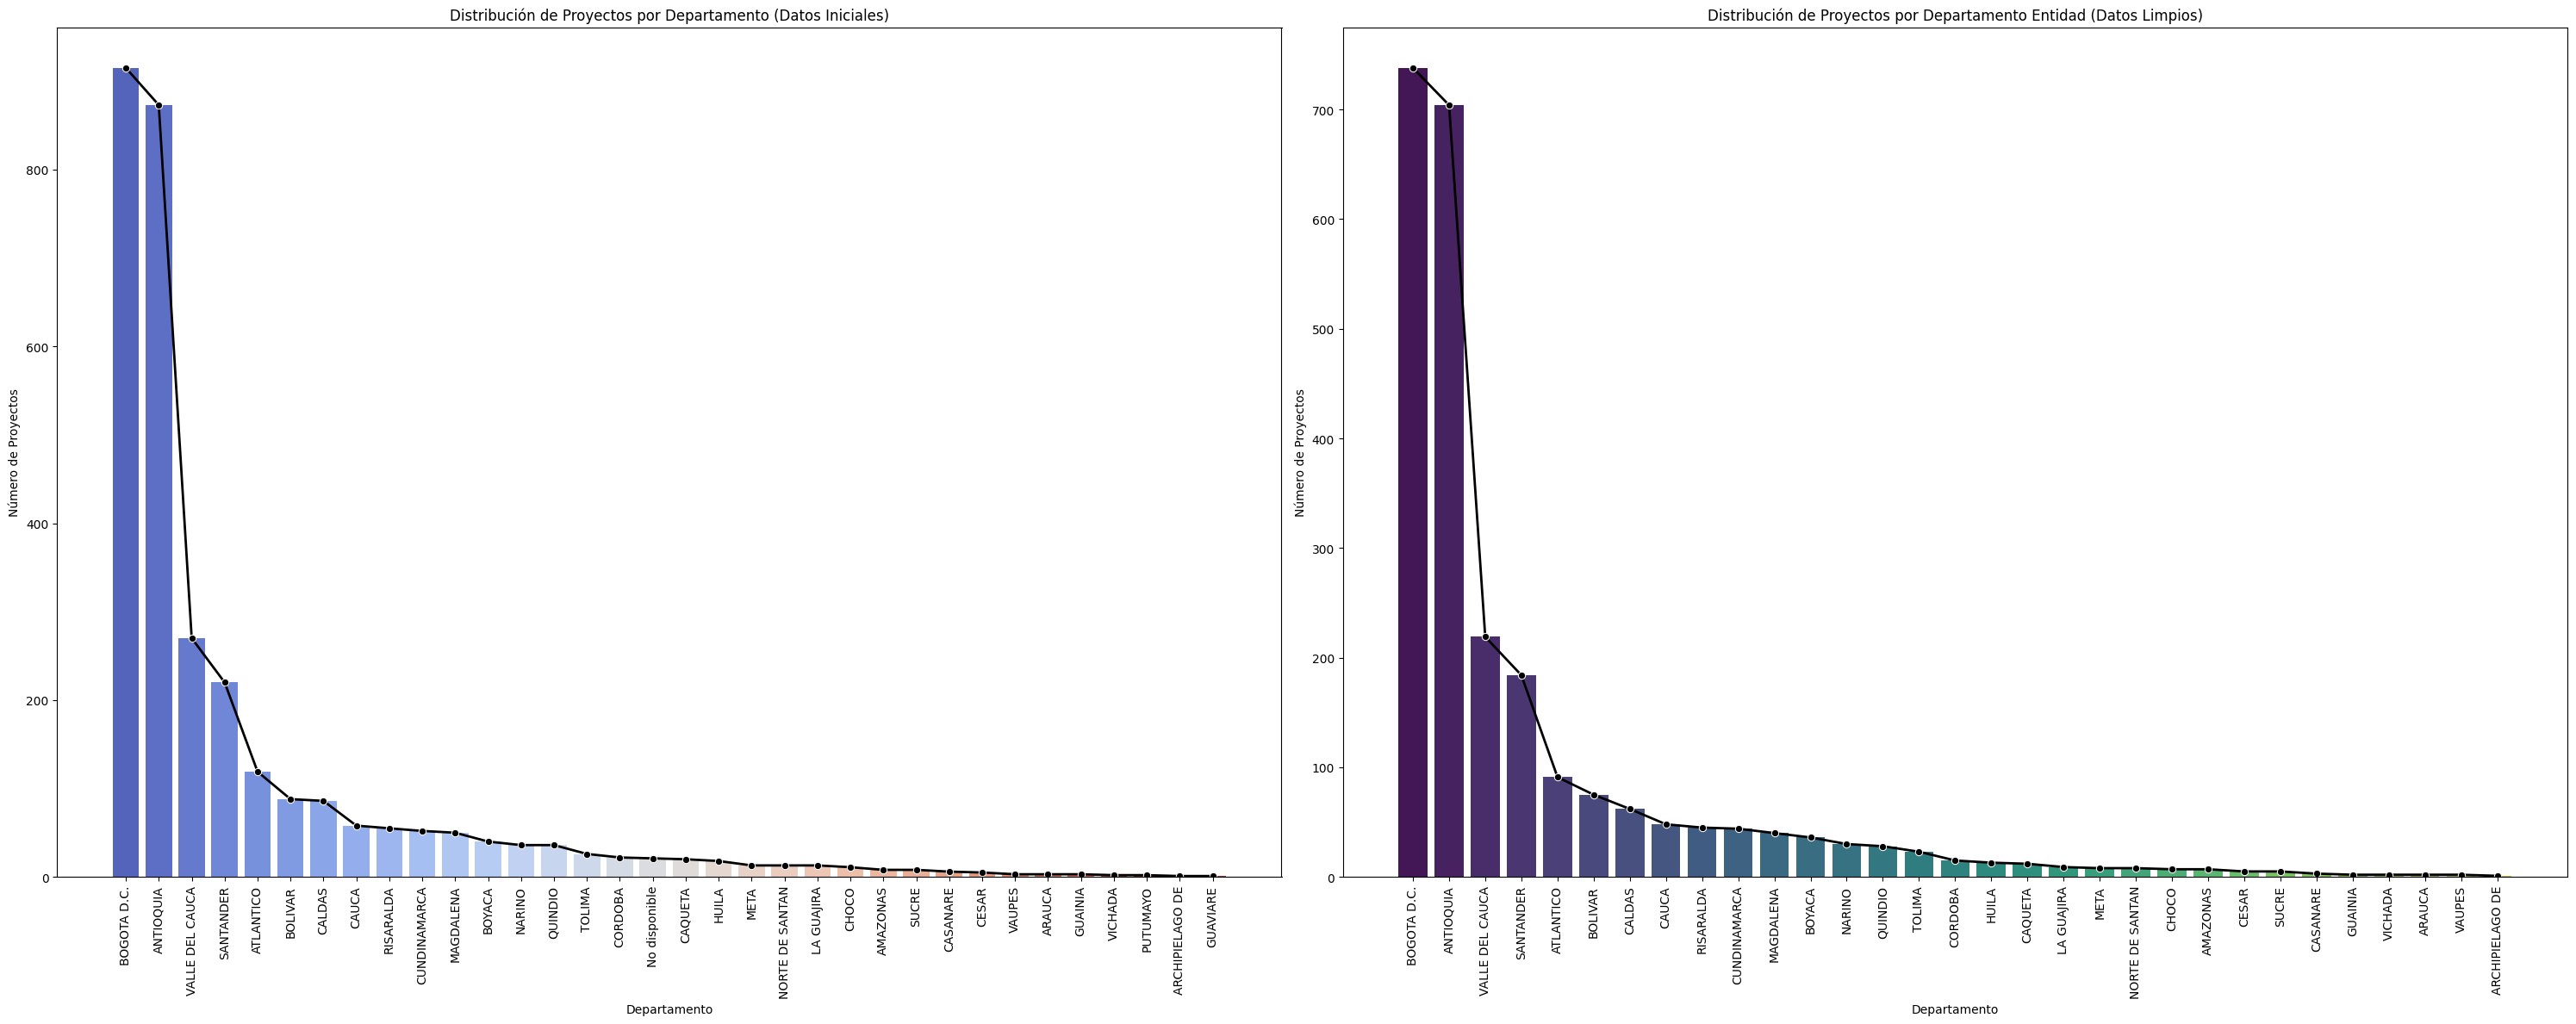

In [35]:
dfOriginal2=dfOriginal
dfOriginal2['NME_DEPTO_PRY'] = dfOriginal2['NME_DEPTO_PRY'].str.slice(0, 15)
dfSinAtipicos['NME_DEPTO_PRY'] = dfSinAtipicos['NME_DEPTO_PRY'].str.slice(0, 15)
plt.figure(figsize=(30, 12))

plt.subplot(1, 2, 1)
sns.countplot(x='NME_DEPTO_PRY', data=dfOriginal2,palette='coolwarm', order=dfOriginal2['NME_DEPTO_PRY'].str.slice(0,15).value_counts().index)
sns.lineplot(x=dfOriginal2['NME_DEPTO_PRY'].value_counts().index, y=dfOriginal2['NME_DEPTO_PRY'].value_counts().values, color='black', marker='o', linewidth=2)
plt.xticks(rotation=90)
plt.title('Distribución de Proyectos por Departamento (Datos Iniciales)')
plt.xlabel('Departamento')
plt.ylabel('Número de Proyectos')

plt.subplot(1, 2, 2)
sns.countplot(x='NME_DEPTO_PRY', data=dfSinAtipicos, palette='viridis',order=dfSinAtipicos['NME_DEPTO_PRY'].str.slice(0,15).value_counts().index)
sns.lineplot(x=dfSinAtipicos['NME_DEPTO_PRY'].value_counts().index, y=dfSinAtipicos['NME_DEPTO_PRY'].value_counts().values, color='black', marker='o', linewidth=2)
plt.xticks(rotation=90)
plt.title('Distribución de Proyectos por Departamento Entidad (Datos Limpios)')
plt.xlabel('Departamento')
plt.ylabel('Número de Proyectos')

plt.tight_layout()
plt.show()

<ipython-input-29-50c4fd1e47f7>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=dfOriginal2['NME_DEPTO_PRY'].value_counts().index, y=dfOriginal2['NME_DEPTO_PRY'].value_counts().values,palette='dark', marker='o', linewidth=2,label='Datos Originales')
<ipython-input-29-50c4fd1e47f7>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=dfSinAtipicos['NME_DEPTO_PRY'].value_counts().index, y=dfSinAtipicos['NME_DEPTO_PRY'].value_counts().values, palette='dark', marker='o', linewidth=2,label='Datos Limpios')


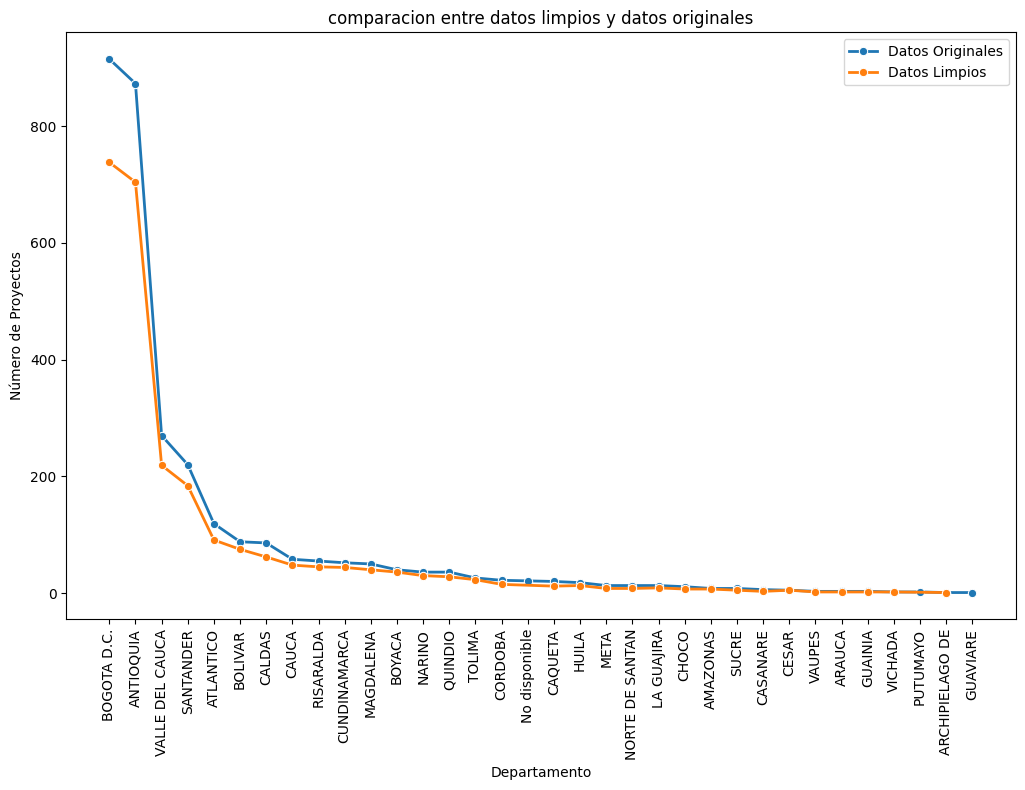

In [ ]:

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 2)
sns.lineplot(x=dfOriginal2['NME_DEPTO_PRY'].value_counts().index, y=dfOriginal2['NME_DEPTO_PRY'].value_counts().values,palette='dark', marker='o', linewidth=2,label='Datos Originales')
sns.lineplot(x=dfSinAtipicos['NME_DEPTO_PRY'].value_counts().index, y=dfSinAtipicos['NME_DEPTO_PRY'].value_counts().values, palette='dark', marker='o', linewidth=2,label='Datos Limpios')
plt.xticks(rotation=90)
plt.title('comparacion entre datos limpios y datos originales')
plt.xlabel('Departamento')
plt.ylabel('Número de Proyectos')

plt.tight_layout()
plt.show()

### 5.6.2 Datos faltantes por Area de ciencia

In [ ]:
valoresFaltantesCiencia=dfSinAtipicos[dfSinAtipicos['NME_AREA_CIENCIA']=='No disponible']
cantidadFCiencia=valoresFaltantesCiencia['NME_AREA_CIENCIA'].value_counts()['No disponible']
cantidadTotalCiencia=len(dfSinAtipicos)
porcentCiencia=(cantidadFCiencia*100)/cantidadTotalCiencia

valoresFaltantesTematica=dfSinAtipicos[dfSinAtipicos['AREA_TEMATICA']=='No disponible']
cantidadFTematica=valoresFaltantesTematica['AREA_TEMATICA'].value_counts()['No disponible']
cantidadTotalTematica=len(dfSinAtipicos)
porcentTematica=(cantidadFTematica*100)/cantidadTotalTematica

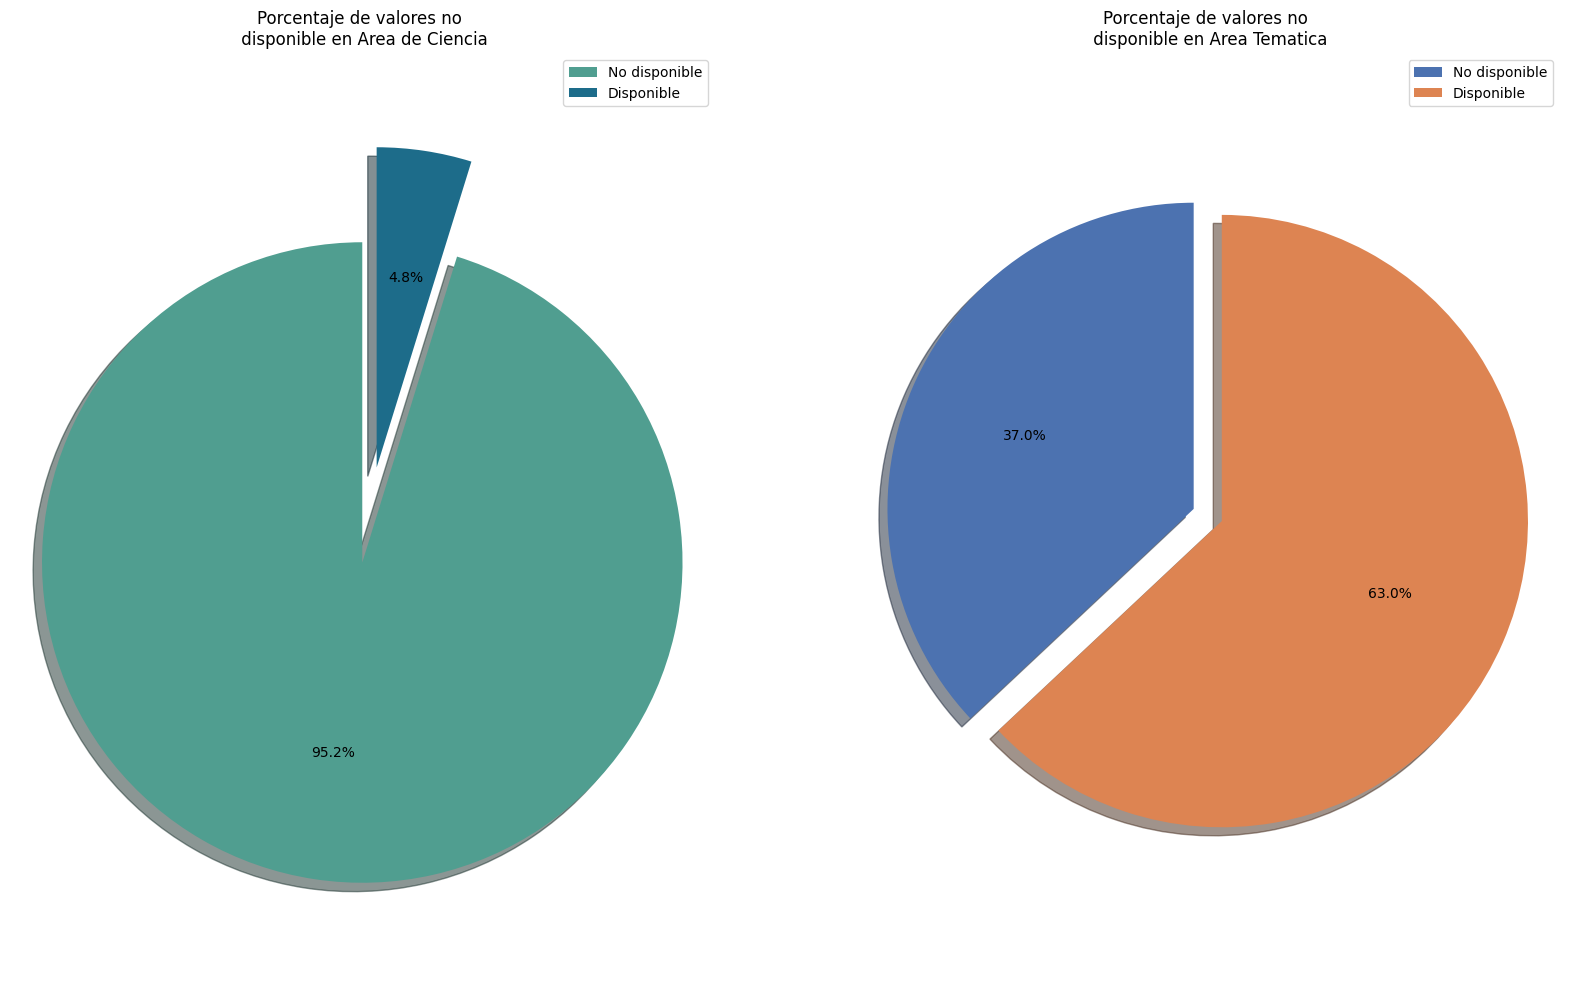

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
plt.pie([cantidadFCiencia, cantidadTotalCiencia - cantidadFCiencia], labels=['No disponible', 'Disponible'], autopct='%1.1f%%', startangle=90,explode = (0.3, 0),shadow=True,colors=sns.color_palette("crest", n_colors=2), labeldistance=None)
plt.title('Porcentaje de valores no \n disponible en Area de Ciencia')
plt.axis('equal')
plt.legend()

plt.subplot(1,2,2)
plt.pie([cantidadFTematica, cantidadTotalTematica - cantidadFTematica], labels=['No disponible', 'Disponible'], autopct='%1.1f%%', startangle=90,explode = (0.1, 0),shadow=True,colors=sns.color_palette("deep", n_colors=2), labeldistance=None)
plt.title('Porcentaje de valores no \n disponible en Area Tematica')
plt.axis('equal')
plt.legend()

plt.show()

In [ ]:
dfSinAtipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2468 entries, 25 to 3096
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PROYECTO_ID              2468 non-null   int64         
 1   CONVOCATORIA_ID          2468 non-null   int64         
 2   ANO_CONVOCATORIA         2468 non-null   int64         
 3   DESC_CONVOCATORIA        2468 non-null   object        
 4   CODIGO_PROYECTO          2468 non-null   int64         
 5   TITULO_PROYECTO          2468 non-null   object        
 6   FECHA_REGISTRO           2468 non-null   datetime64[ns]
 7   FECHA_APROBACION         2468 non-null   datetime64[ns]
 8   ENTIDAD_EJECUTA          2468 non-null   object        
 9   TIPO_FINANCIACION        2468 non-null   object        
 10  DESC_FINANCIACION        2468 non-null   object        
 11  COD_PROG_CTI             2468 non-null   int64         
 12  NME_PROG_CTI             2468 non-null

In [ ]:
dfSinAtipicos.to_csv('DataSetLimpio.csv', index=False)

!cp DataSetLimpio.csv //content/ProyectoAnalisisDeDatos

¿En qué años se financiaron más proyectos?

Esto se responde observando el gráfico de barras "Número de Proyectos por Año", donde se identifican los años con picos significativos en la cantidad de proyectos financiados.
¿Cómo ha evolucionado la cantidad de proyectos financiados a lo largo del tiempo?

Este gráfico también muestra tendencias de crecimiento o disminución en la cantidad de proyectos a lo largo de los años.
¿Qué años tuvieron los mayores montos totales financiados?

El gráfico de líneas "Total Financiado por Año" refleja los años con mayores picos de financiamiento total.
¿Hay relación entre el número de proyectos y el monto total financiado?

Comparando ambos gráficos, se puede analizar si los años con más proyectos financiados también coinciden con los mayores montos totales financiados.
¿Se observa alguna tendencia general en el financiamiento después de 2015?

El gráfico de líneas muestra una disminución significativa en los montos financiados después de 2015, lo que permite investigar posibles causas de esta tendencia.